In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from astropy.io import fits
from scipy.interpolate import interp1d
from kbastroutils.gnd import GND
from kbastroutils.mag2flux import mag2flux

The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol
The following tasks in the acstools package can be run with TEAL:
          acs2d                  acs_destripe           acs_destripe_plus     
          acsccd                    acscte              acscteforwardmodel    
          acsrej                    acssum                    calacs
PixCteCorr is no longer supported. Please use acscte.


In [2]:
FILE_LIST = {'G102': '/Users/kbhirombhakdi/_work/___GD71_PID12702_stable/GD71PID12702G102.pickle'
             ,'G141': '/Users/kbhirombhakdi/_work/___GD71_PID12702_stable/GD71PID12702G141.pickle'
            }

BOUND = {'G102': (8000.,11300.)
         ,'G141': (11200.,16000.)}

STANDARD = '/Users/kbhirombhakdi/_work/_calib_files/PYSYN_CDBS/calspec/gd71_mod_010.fits'


10551.0 1.929550225709344e-15
9864.7 2.354905374799748e-15
13922.8 6.436867029765903e-16
15369.1 4.35152585215292e-16


(<matplotlib.legend.Legend at 0x1c1dfbb490>,
 <matplotlib.legend.Legend at 0x1c1dfc99d0>)

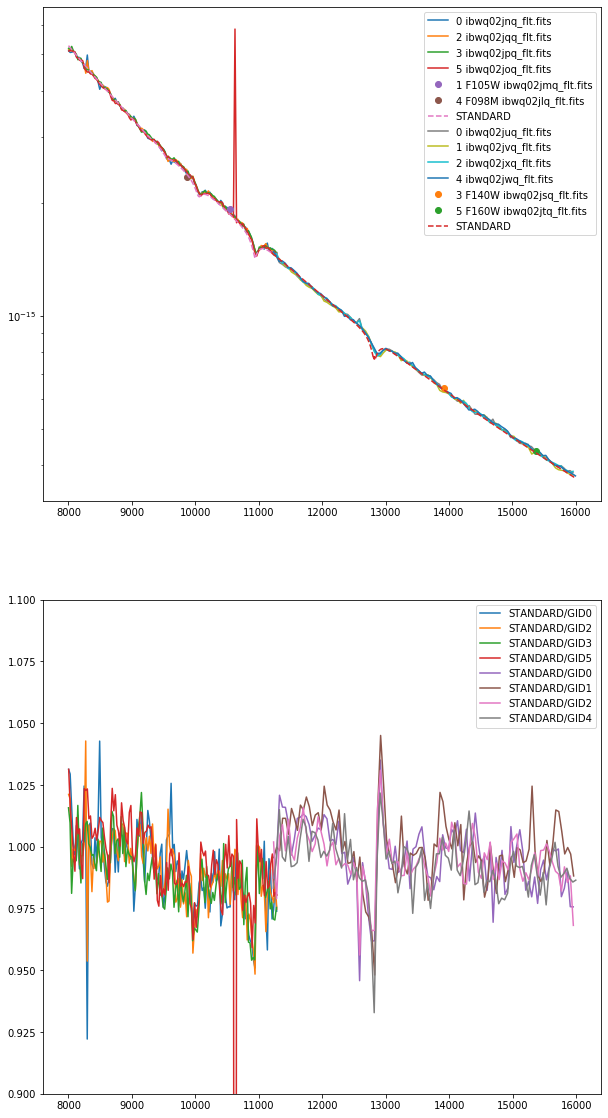

In [3]:
n = 2
fig,ax = plt.subplots(n,1,figsize=(10,n*10))
for i,ii in enumerate(FILE_LIST):
    if not FILE_LIST[ii]:
        continue
    f = open(FILE_LIST[ii],'rb')
    OUTPUT = pickle.load(f)
    f.close()
    for j in OUTPUT.pairs:
        for k in OUTPUT.pairs[j]:
            WAVE,FLAM = OUTPUT.meta[k]['WW'],OUTPUT.meta[k]['FLAM']
            m = np.where((WAVE>=BOUND[ii][0]) & (WAVE<=BOUND[ii][1]))       
            ax[0].plot(WAVE[m],FLAM[m],label='{0} {1}'.format(k,OUTPUT.files[k].split('/')[-1]))
    
    for j in OUTPUT.did:
        try:
            abmag,eabmag = OUTPUT.meta[j]['ABMAG'][0],OUTPUT.meta[j]['ABMAG'][1]
            wave = OUTPUT.meta[j]['PHOT_PARAMS']['ZP'][0]
            filt = OUTPUT.meta[j]['PHOT_PARAMS']['FILTER']
            print(wave,mag2flux(abmag,wave))
            ax[0].plot(wave,mag2flux(abmag,wave),'o',alpha=1.,label='{0} {1} {2}'.format(j,filt,OUTPUT.files[j].split('/')[-1]))
        except:
            pass
    
    x = fits.open(STANDARD)
    STWW = []
    STFLAM = []
    for j,jj in enumerate(x[1].data):
        STWW.append(jj[0])
        STFLAM.append(jj[1])
    STWW = np.array(STWW)
    STFLAM = np.array(STFLAM)
    STAND_MOD = interp1d(STWW,STFLAM,kind='quadratic',bounds_error=False,fill_value=np.nan)
    m = np.where((STWW>=BOUND[ii][0]) & (STWW<=BOUND[ii][1]))       
    ax[0].plot(STWW[m],STAND_MOD(STWW[m]),'--',label='STANDARD')
    
    for j in OUTPUT.pairs:
        for k in OUTPUT.pairs[j]:
            WAVE,FLAM = OUTPUT.meta[k]['WW'],OUTPUT.meta[k]['FLAM']
            m = np.where((WAVE>=BOUND[ii][0]) & (WAVE<=BOUND[ii][1]))
            ax[1].plot(WAVE[m],STAND_MOD(WAVE[m])/FLAM[m],label='STANDARD/GID{0}'.format(k))
                        
ax[0].set_yscale('log')
ax[1].set_ylim(0.9,1.1)
ax[0].legend(),ax[1].legend()